In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):
    def __init__(self, p, d):
        super(NeuralNet, self).__init__()
        layers = [nn.Linear(1, d), nn.ReLU()]
        for _ in range(p - 1):
            layers.append(nn.Linear(d, d))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(d, 1))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

In [2]:
def f(x):
    return x*(1-x)

def generate_data(n=500):
    x = np.random.rand(n, 1).astype(np.float32)
    y = f(x)
    return torch.tensor(x), torch.tensor(y)

In [3]:
def train_model(p, d, epochs=500, batch_size=64):
    x_train, y_train = generate_data()
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = NeuralNet(p, d)
    optimizer = optim.Adam(model.parameters())
    lossFn = nn.MSELoss()
    model.train()
    for _ in range(epochs):
        for x, y in dataloader:
            yhat = model(x)
            optimizer.zero_grad()
            loss = lossFn(yhat, y)
            loss.backward()
            optimizer.step()
    xtest = torch.linspace(0, 1, 100).reshape(-1, 1)
    y = f(xtest)
    yhat = model(xtest)
    err = torch.max(torch.abs(y-yhat)).item()
    return model, err, xtest.detach().numpy(), yhat.detach().numpy(), y.detach().numpy()

In [4]:
ps = [2, 3, 4, 5, 6]
ds = [3, 10, 50, 100]
for d in ds:
    for p in ps:
        error = train_model(p, d)[1]
        print(f"d={d}, p={p}, error = {error}")

d=3, p=2, error = 0.1787548065185547
d=3, p=3, error = 0.03393220901489258
d=3, p=4, error = 0.18836811184883118
d=3, p=5, error = 0.1619497537612915
d=3, p=6, error = 0.011621370911598206
d=10, p=2, error = 0.008667349815368652
d=10, p=3, error = 0.010751308873295784
d=10, p=4, error = 0.006285190582275391
d=10, p=5, error = 0.004105847328901291
d=10, p=6, error = 0.004434302449226379
d=50, p=2, error = 0.005145326256752014
d=50, p=3, error = 0.0009924918413162231
d=50, p=4, error = 0.0034025385975837708
d=50, p=5, error = 0.0016127489507198334
d=50, p=6, error = 0.0016949698328971863
d=100, p=2, error = 0.0018745064735412598
d=100, p=3, error = 0.005339553579688072
d=100, p=4, error = 0.002215571701526642
d=100, p=5, error = 0.003377161920070648
d=100, p=6, error = 0.005800008773803711


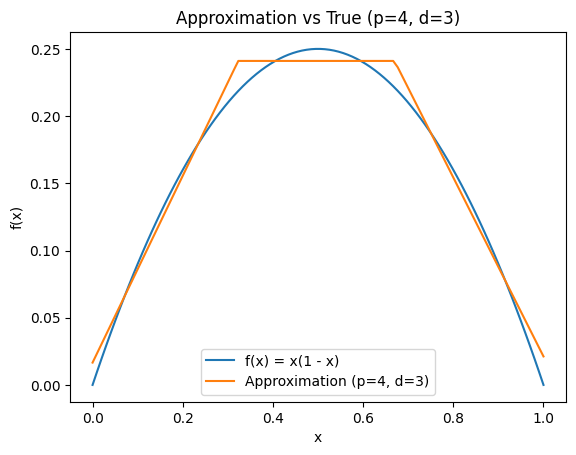

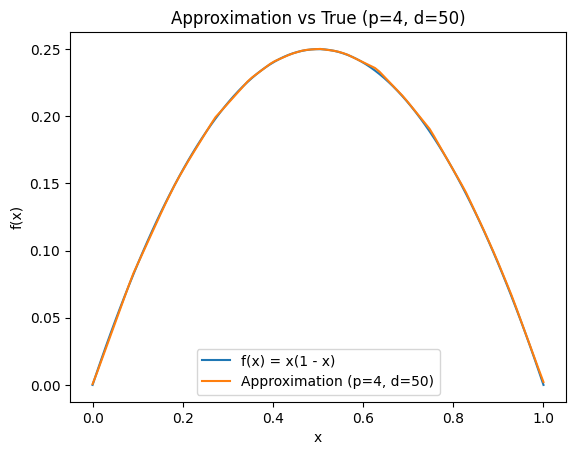

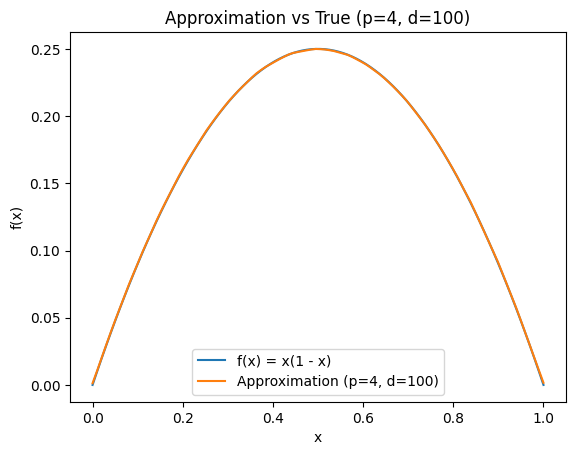

In [5]:
configs = [(4, 3), (4, 50), (4, 100)]
for p, d in configs:
    model, error, x, yhat, y = train_model(p, d)
    plt.plot(x, y, label="f(x) = x(1 - x)")
    plt.plot(x, yhat, label=f"Approximation (p={p}, d={d})")
    plt.title(f"Approximation vs True (p={p}, d={d})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

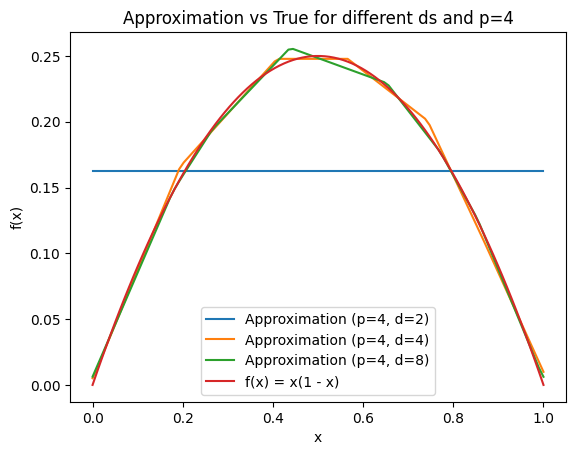

In [12]:
p=4
for d in [2,4, 8]:
    model, error, x, yhat, y = train_model(p, d)
    plt.plot(x, yhat, label=f"Approximation (p={p}, d={d})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
plt.title(f"Approximation vs True for different ds and p=4")
plt.plot(x, y, label="f(x) = x(1 - x)")
plt.legend()
plt.show()